# 1. Setup and Data loading

In [206]:
# %cd D:\Project\Assignment-Arya

D:\Project\Assignment-Arya


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('./dataset/training_set.csv')

# removing unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [174]:
# Input features
X = df.drop(["Y"],axis=1)
# Target 
y = df.Y

# 2. Exploratory Data Analysis

## 2.1 Basic Analysis

- All values are numerical.
- All columns are decimal value except X56, X57 and Y columns which are integer value.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

- Values of X55, X56, and X57 have very big range compare to all other features (which usually in range of 0 to 42). We can normalize dataset.
- Features are mostly left skewed, If you observe mean and median value.

In [176]:
# describe method with median parameter attached to it
pd.concat([
        df.describe(), 
        pd.DataFrame(df.median(), columns=['median']).T
    ])

# df_describe.append(df.reindex(df_describe.columns, axis=1).agg(['median']))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000
median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000


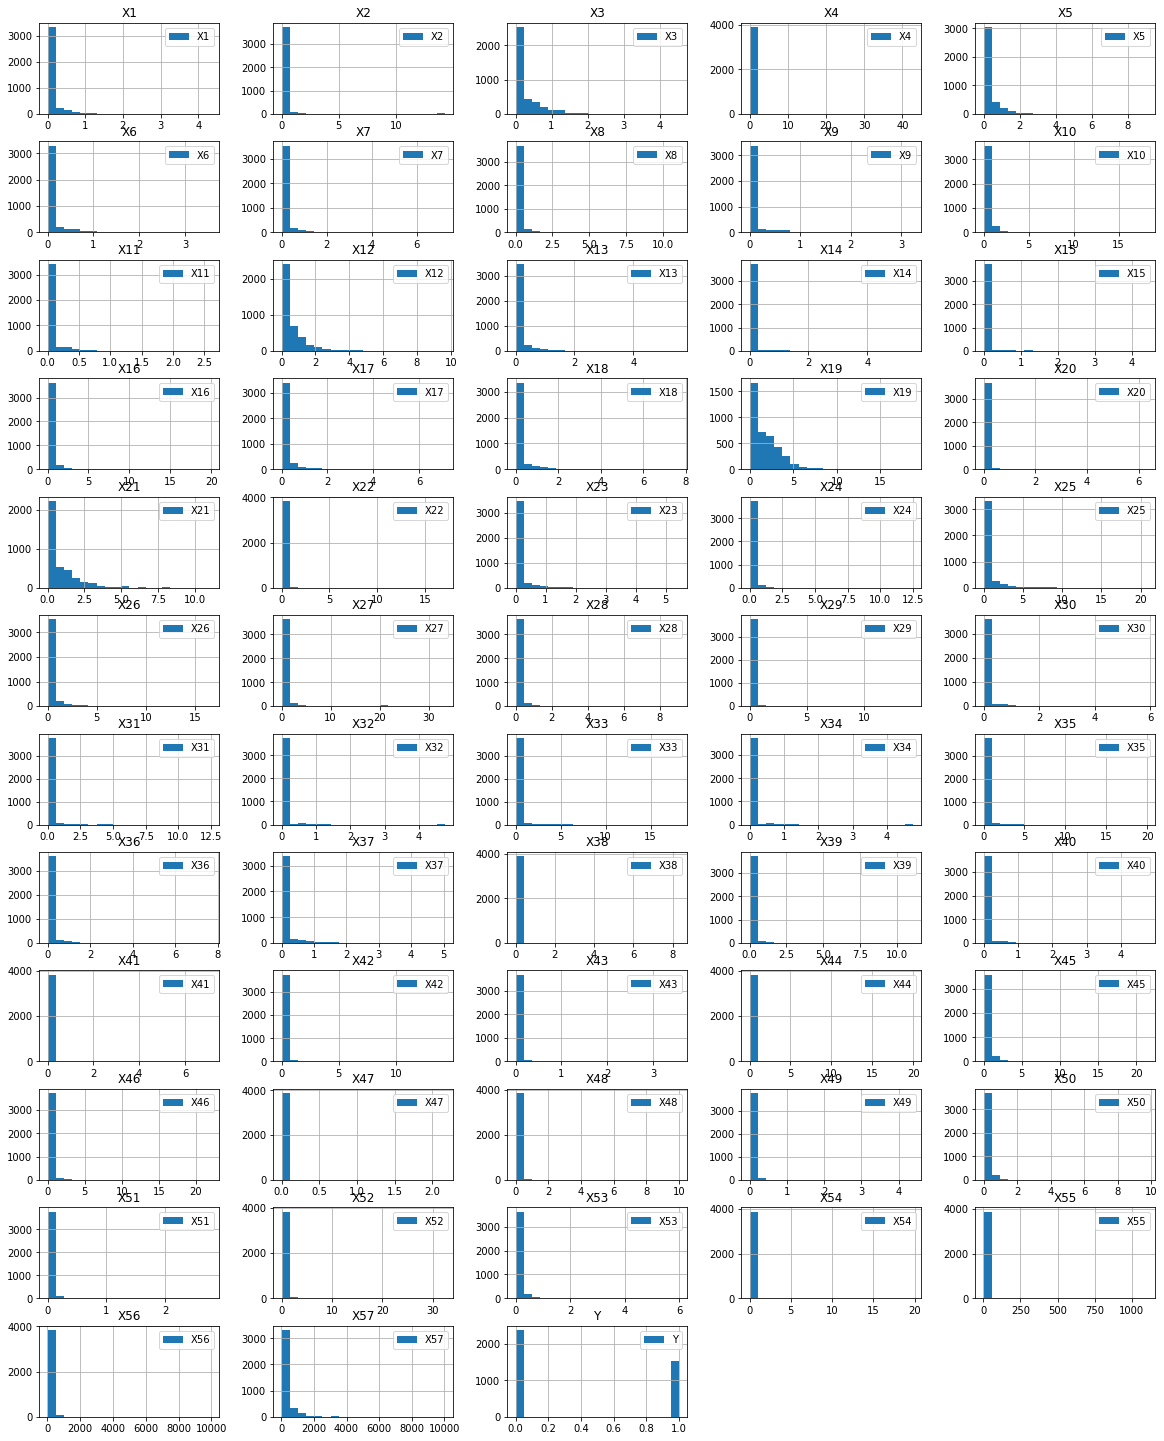

In [177]:
df.hist(figsize=(20,30), bins=20, layout=(14,5), legend=True)
plt.show()

There is no null, NaN values persent in dataset

In [178]:
# check if any null/NAN values in data
df.isna().sum().sum()

0

## 2.2 Zero Inflated Dataset

- But it seems like dataset is zero inflated.
- Thoughs on How to handle it
    - Possion model
    - ZIP (Zero Inflated possion)
    - Zero Inflated (for discrete distribution as your case would be a ZIB Zero Inflated Binomial) - you could add an EM algorithm to improve accuracy.
    - Negative Binomial
    - GLM
    - Double Hurdle (the first step is a logit or probit)
    - Tweedie Distribution (with a case that in my opinion is not applicable to your problem)
    - Bayesian -> MCMC

Almost 77% of data in dataset is Zero which is huge problem.

In [179]:
zero_count = (X == 0).sum().sum()
print(f"Total number of zeros in all features: {zero_count}")
zero_percent = (zero_count/X.size)*100
print(f"Percentage of zeros in all features: {zero_percent:.2f} %")

Total number of zeros in all features: 172375
Percentage of zeros in all features: 77.34 %


## 2.3 Check for Imbalanced Dataset

In [180]:
target_freq = df.Y.value_counts().reset_index()
target_freq

,index,Y
0,0,2376
1,1,1534


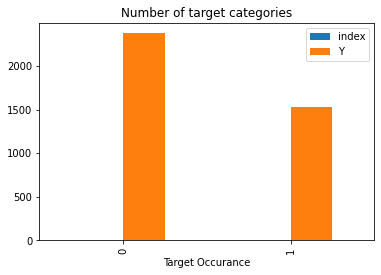

In [181]:
target_freq.plot(kind='bar')
plt.xlabel('Target Value')
plt.xlabel('Target Occurance')
plt.title("Number of target categories")
plt.show()

In [182]:
# Check percentage of output class
df.Y.value_counts(normalize=True)*100

0    60.767263
1    39.232737
Name: Y, dtype: float64

It's kind of imbalanced datset. Around 61% data belong to "0" class and 39% data to "1" class

## 2.4. Corrleation

In [183]:
# df.corr().Y
corr_matrix = pd.DataFrame(abs(df.corrwith(df['Y'])), columns=['Y']).sort_values('Y', ascending=False)
corr_matrix.style.background_gradient(cmap='coolwarm')

,Y
Y,1.000000
X21,0.393099
X23,0.338913
X7,0.327233
X53,0.317384
X19,0.283936
X57,0.270421
X17,0.269190
X16,0.264826
X25,0.254344


# 3. Preprocessing

# 4. Modeling

In [171]:
from sklearn.model_selection import train_test_split

# train to validation ratio should be 4:1. (Given in assignment document)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)

In [162]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [163]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [168]:
# using r2_score
regressor.score(X_test, y_test)

# from sklearn.metrics import r2_score
# r2_score(y_test, regressor.predict(X_test), sample_weight=None, multioutput='variance_weighted')

0.7919276921259124

In [69]:
pd.DataFrame(regressor.feature_importances_, columns=['Imp']).sort_values('Imp', ascending=False)

,Imp
52,0.338177
6,0.088612
23,0.080243
15,0.064706
24,0.064317
51,0.063197
26,0.043915
45,0.039713
20,0.031122
54,0.023803


In [169]:
# Normalize data
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# cols_to_norm = ['Age','Height']
# surveyData[cols_to_norm] = StandardScaler().fit_transform(surveyData[cols_to_norm])

In [170]:

# find zero values and treatment
# feature selection
# feature engineering
# Manage Imbalanced Dataset using Techiques or F1-Score
# Different models
# - Logisitic Regression
# - XGBoost
# - Random Forst
# - Ada boost 

# 5. Prediction on Test dataset

In [190]:
test_df = pd.read_csv('./dataset/test_set.csv')

# removing unnamed columns
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [197]:
# Prediction on test data
test_pred = regressor.predict(test_df)
# convert into pandas dataframe
test_pred = pd.DataFrame(test_pred, columns=["Y"])

In [208]:
import os
# save to excel file in result folder
result_path = os.path.join('result')
result_file_name = 'test_set_result.csv'
if not os.path.exists('result'):
    os.mkdir(result_path)
test_pred.to_csv(os.path.join(result_path, result_file_name))